In [53]:
import os
os.getcwd()

'C:\\Users\\vinay\\Desktop\\Movie-Rating-Prediction-master'

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("Train.csv")

In [56]:
df.head() # prints first few (4) values of the dataset

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [57]:
df['label'].value_counts() # Using Pandas Value Counts function to no. of positive and negative reviews

pos    20011
neg    19989
Name: label, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder # Converting target variable into encoding
le = LabelEncoder()

In [59]:
y = df['label'].values # using .values function to convert into NumPy array
y

array(['pos', 'pos', 'pos', ..., 'neg', 'pos', 'pos'], dtype=object)

In [60]:
y = le.fit_transform(y) # will convert positive reviews into 1's and negative reviews into 0's

In [61]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [62]:
df['review'][0]

"mature intelligent and highly charged melodrama unbelivebly filmed in China in 1948. wei wei's stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it"

In [63]:
df['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [64]:
df['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

# Preprocessing Test Data

In [65]:
import re # for regular expressions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # importing stopwords from Natural Language Toolkit library
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [67]:
def clean_text(sample): # constructing our clean_text function
    sample = sample.lower() # lower case
    sample = sample.replace("<br /><br />" , "") # will replace line breaks from HTML pages with nothing
    sample = re.sub("[^a-zA-Z]+", " ", sample) # Regular Expression - will substitute characters not apart A-Z with space
    
    sample = sample.split(" ") # will split words into list format
    
    sample = [ps.stem(s) for s in sample if s not in sw] # list comprehension & porter stemming to stem words into root words
    
    sample = " ".join(sample) #converting list format words back into sentences
    
    return sample

In [68]:
clean_text(df['review'][11]) # cleaning the 11th review [stemming and removing a, is, etc.]

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [69]:
df['review'][11] # same uncleaned review for comparison

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [70]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [71]:
df # comparison after cleaning

,review,label,cleaned_review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...
...,...,...,...
39995,There are similarities between Ray Lawrence's ...,neg,similar ray lawrenc jindabyn last movi lantana...
39996,"For starters, I once met the director when he ...",neg,starter met director go ww enact period movi c...
39997,"Much of ""Over Her Dead Body"" is so painfully u...",neg,much dead bodi pain unfunni actual squirm seat...
39998,"""Lifeforce"" is a truly bizarre adaptation of t...",pos,lifeforc truli bizarr adapt novel space vampi...


In [72]:
df['cleaned_review']

0        matur intellig highli charg melodrama unbelive...
1        http video googl com videoplay docid hl en dis...
2        titl opera director dario argento cast cristin...
3        think lot peopl wrote anoth one tom cruis weir...
4        stori two dog cat look way back home old wise ...
                               ...                        
39995    similar ray lawrenc jindabyn last movi lantana...
39996    starter met director go ww enact period movi c...
39997    much dead bodi pain unfunni actual squirm seat...
39998     lifeforc truli bizarr adapt novel space vampi...
39999    saw movi screener best movi seen loooong time ...
Name: cleaned_review, Length: 40000, dtype: object

In [73]:
corpus = df['cleaned_review'].values #converting reviews from pandas series into NumPy array

In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # to create a vocabulary of unique words and convert them into tabular format

In [75]:
cv = CountVectorizer(max_df = 0.5, max_features = 50000) # will discard values with document frequency more than 0.5 & sets limit to 50000 unique words

In [76]:
X = cv.fit_transform(corpus) # Text is tranformed into sparse matrix

In [77]:
X.shape

(40000, 50000)

In [78]:
print(X[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [79]:
tfidf =  TfidfTransformer()

In [80]:
X = tfidf.fit_transform(X) # Same function as CountVectorizer but more advanced

In [81]:
print(X[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [82]:
X.shape

(40000, 50000)

In [83]:
y.shape

(40000,)

# Neural Network

In [84]:
from keras import models #library for artificial neural networks
from keras.layers import Dense # Building the model

In [85]:
model = models.Sequential() # Making the network
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                800016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer='rmsprop' , loss= "binary_crossentropy", metrics=['accuracy']) # Model compiled

In [116]:
# Getting the necessary data
X_val = X[:5000] 
X_train = X[5000:]


y_val = y[:5000]
y_train = y[5000:]

In [119]:
# Sorting indices
X_train.sort_indices()
X_val.sort_indices()

In [120]:
X_train.shape, y_train.shape 

((35000, 50000), (35000,))

In [122]:
# Fitting the model
hist = model.fit(X_train, y_train, batch_size=128, epochs=2, validation_data=(X_val, y_val), shuffle=True)
print(model.evaluate(X_val, y_val))

Epoch 1/2


c:\users\vinay\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


274/274 [==============================] - 41s 138ms/step - loss: 0.4167 - accuracy: 0.8639 - val_loss: 0.2606 - val_accuracy: 0.8966
Epoch 2/2
157/157 [==============================] - 35s 1ms/step - loss: 0.2487 - accuracy: 0.8968
[0.24868662655353546, 0.8967999815940857]


In [123]:
result = hist.history

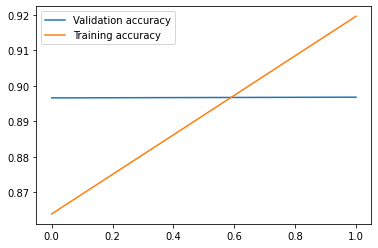

In [126]:
plt.plot(result['val_accuracy'], label = "Validation accuracy") # plotting Validation accuracy vs Training accuracy
plt.plot(result['accuracy'], label = "Training accuracy")
plt.legend()
plt.show()

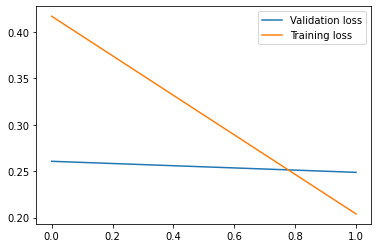

In [128]:
plt.plot(result['val_loss'], label = "Validation loss") # plotting validation loss vs training loss
plt.plot(result['loss'], label = "Training loss")
plt.legend()
plt.show()

In [129]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 35s 1ms/step - loss: 0.2487 - accuracy: 0.8968


[0.24868662655353546, 0.8967999815940857]

# Test Time

In [130]:
test = pd.read_csv("Test.csv") # Importing test data

In [131]:
test.shape

(10000, 1)

In [132]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [133]:
test['cleaned_review'] = test['review'].apply(clean_text) # Cleaning test reviews


In [134]:
X_test = test['cleaned_review']

In [135]:
X_test = cv.transform(X_test) # Will create sparse matrix

In [136]:
X_test.shape

(10000, 50000)

In [139]:
X_test = tfidf.transform(X_test) # Pre-processing

In [140]:
y_pred = model.predict(X_test) # Predicting outcome

In [144]:
y_pred[ y_pred >= 0.5 ]  =  1 # Marking all reviews with probability > 0.5 as "1" which means positive

In [145]:
y_pred = y_pred.astype('int') # Converting from float to integer

In [146]:
y_pred[:10] # "1" means positive and "0" means negative

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [147]:
# Labeling positive and negative
dic = {0 : 'neg' , 1 : 'pos'}
y_pred = [ dic[p[0]] for p in y_pred ] 

In [148]:
 ids = np.arange(10000) # Creating id column for review file

In [149]:
final_matrix = np.stack((ids, y_pred), axis =1) # first column id and second column predictions

In [151]:
dataframe = pd.DataFrame(final_matrix, columns=['Id', 'label']) # passing matrix as a dataframe

In [152]:
dataframe.to_csv("y_pred.csv", index = False) # exporting the dataframe as a csv file